
# Using Astropy

## Coordinate conversion

Astropy provides useful tools to convert between the coordinate systems. 

The International Celestial Reference System (ICRS) is the current standard celestial reference system adopted by the International Astronomical Union (IAU).
Its origin is at the barycenter of the Solar System, with axes that are intended to "show no global rotation with respect to a set of distant extragalactic objects". 

In [2]:
!pip install wget 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import astropy 
import pylab as pl 
from astropy import units as u
from astropy import constants as const 
from astropy.coordinates import SkyCoord
import wget
import numpy as np 

In [4]:

coord1 = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')


sometimes however RA is referred in _hourangle_ units and Declination in degrees, minutes and seconds 

In [5]:
coord2 = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')

we can then use the conversion tool to switch between one unit frame and the other , as well as different coordinate system

In [6]:
print(coord1.ra.to((u.hourangle)),
coord2.dec.to(u.deg) ,
coord1.galactic,   )

0h42m30s 41d12m00s <SkyCoord (Galactic): (l, b) in deg
    (121.12334339, -21.6403587)>


It is also possible to input coordinate values in other representations
such as cartesian or cylindrical.  In this case one includes the keyword
argument ``representation_type='cartesian'`` (for example) along with data
in ``x``, ``y``, and ``z`` , we need to provide a distance though. this is very useful when dealing with 3D volume data. 

In [7]:
coord3 = SkyCoord(0*u.deg, 0*u.deg,'100kpc', frame='galactic')
print(coord3, coord3.cartesian, coord3.cylindrical, coord3.spherical) 

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    (0., 0., 100.)> (100., 0., 0.) kpc (100., 0., 0.) (kpc, deg, kpc) (0., 0., 100.) (deg, deg, kpc)


## using constants and units 

In [8]:
Tsun= 5000 *u.K 
print((const.k_B*Tsun).to(u.eV)) 
wavelength= 800 *u.um 
freq= (const.c/wavelength).to(u.THz)
print(freq)

0.4308666631072589 eV
0.3747405725 THz


## reading   data FITS format   
Flexible Image Transport System (FITS) is an open standard defining a digital file format useful for storage, transmission and processing of data: formatted as multi-dimensional arrays (for example a 2D image), or tables. FITS is the most commonly used digital file format in astronomy. The FITS standard was designed specifically for astronomical data, and includes provisions such as describing photometric and spatial calibration information, together with image origin metadata.

The FITS format was first standardized in 1981; it has evolved gradually since then, and the most recent version (4.0) was standardized in 2016. FITS was designed with an eye towards long-term archival storage, and the maxim once FITS, always FITS represents the requirement that developments to the format must be backward compatible.

Image metadata is stored in a human-readable ASCII header. The information in this header is designed to calculate the byte offset of some information in the subsequent data unit to support direct access to the data cells. Each FITS file consists of one or more headers containing ASCII card images that carry keyword/value pairs, interleaved between data blocks. The keyword/value pairs provide information such as size, origin, coordinates, binary data format, free-form comments, history of the data, and anything else the creator desires: while many keywords are reserved for FITS use, the standard allows arbitrary use of the rest of the name-space.

FITS is also often used to store non-image data, such as spectra, photon lists, data cubes, or structured data such as multi-table databases. A FITS file may contain several extensions, and each of these may contain a data object. For example, it is possible to store x-ray and infrared exposures in the same file.

#### Download the Data Release 1 of Gaia 

we download  data from the 1st GAIA data release, these data encode parallaxes of tons of stars. 


In [9]:
from astropy.io import fits ,ascii 
try : 
    hdu = fits.open( 'GaiaSource_000-000-000.fits')
except FileNotFoundError:
    file = wget.download("http://cdn.gea.esac.esa.int/Gaia/gdr1/gaia_source/fits/GaiaSource_000-000-000.fits") 
    hdu = fits.open( 'GaiaSource_000-000-000.fits')
        

### FITS  headers 
Every Header Data Unit (HDU) normally has two components: header and data. In astropy these two components are accessed through the two attributes of the HDU, hdu.header and hdu.data.

While an HDU may have empty data (i.e., the .data attribute is None), any HDU will always have a header.

Usually the primary header looks like this : 

In [10]:
hdu[0].header, 

(SIMPLE  =                    T / Standard FITS format                           
 BITPIX  =                    8 / Character data                                 
 NAXIS   =                    1 / Text string                                    
 NAXIS1  =                36532 / Number of characters                           
 VOTMETA =                    T / Table metadata in VOTable format               
 EXTEND  =                    T / There are standard extensions                  
 COMMENT                                                                         
 COMMENT The data in this primary HDU consists of bytes which                    
 COMMENT comprise a VOTABLE document.                                            
 COMMENT The VOTable describes the metadata of the table contained               
 COMMENT in the following BINTABLE extension.                                    
 COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
 COMMENT good ta

the second header is the card encoding the astrophysical infos, the format of each columns,the units, the name ,etc... 

In [11]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  321 / width of table in bytes                        
NAXIS2  =               218453 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   57 / number of columns                              
EXTNAME = 'GaiaSource_000-000-000.fits' / table name                            
TTYPE1  = 'solution_id'        / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TUCD1   = 'meta.id;meta.version'                                                
TTYPE2  = 'source_id'       

Astropy provides utils to access the columns entity 

In [12]:
hdu[1].columns 

ColDefs(
    name = 'solution_id'; format = 'K'
    name = 'source_id'; format = 'K'
    name = 'random_index'; format = 'K'
    name = 'ref_epoch'; format = 'D'; unit = 'Time[Julian Years]'
    name = 'ra'; format = 'D'; unit = 'Angle[deg]'
    name = 'ra_error'; format = 'D'; unit = 'Angle[mas]'
    name = 'dec'; format = 'D'; unit = 'Angle[deg]'
    name = 'dec_error'; format = 'D'; unit = 'Angle[mas]'
    name = 'parallax'; format = 'D'; unit = 'Angle[mas]'
    name = 'parallax_error'; format = 'D'; unit = 'Angle[mas]'
    name = 'pmra'; format = 'D'; unit = 'Angular Velocity[mas/year]'
    name = 'pmra_error'; format = 'D'; unit = 'Angular Velocity[mas/year]'
    name = 'pmdec'; format = 'D'; unit = 'Angular Velocity[mas/year]'
    name = 'pmdec_error'; format = 'D'; unit = 'Angular Velocity[mas/year]'
    name = 'ra_dec_corr'; format = 'E'; unit = 'Dimensionless[see description]'
    name = 'ra_parallax_corr'; format = 'E'; unit = 'Dimensionless[see description]'
    name = 'ra_p

In [13]:
hdu[1].columns['parallax']

name = 'parallax'; format = 'D'; unit = 'Angle[mas]'

whereas the data are accessible with

In [14]:
hdu[1].data['parallax']

array([nan, nan, nan, ..., nan, nan, nan])

let's see what we can do with data... 

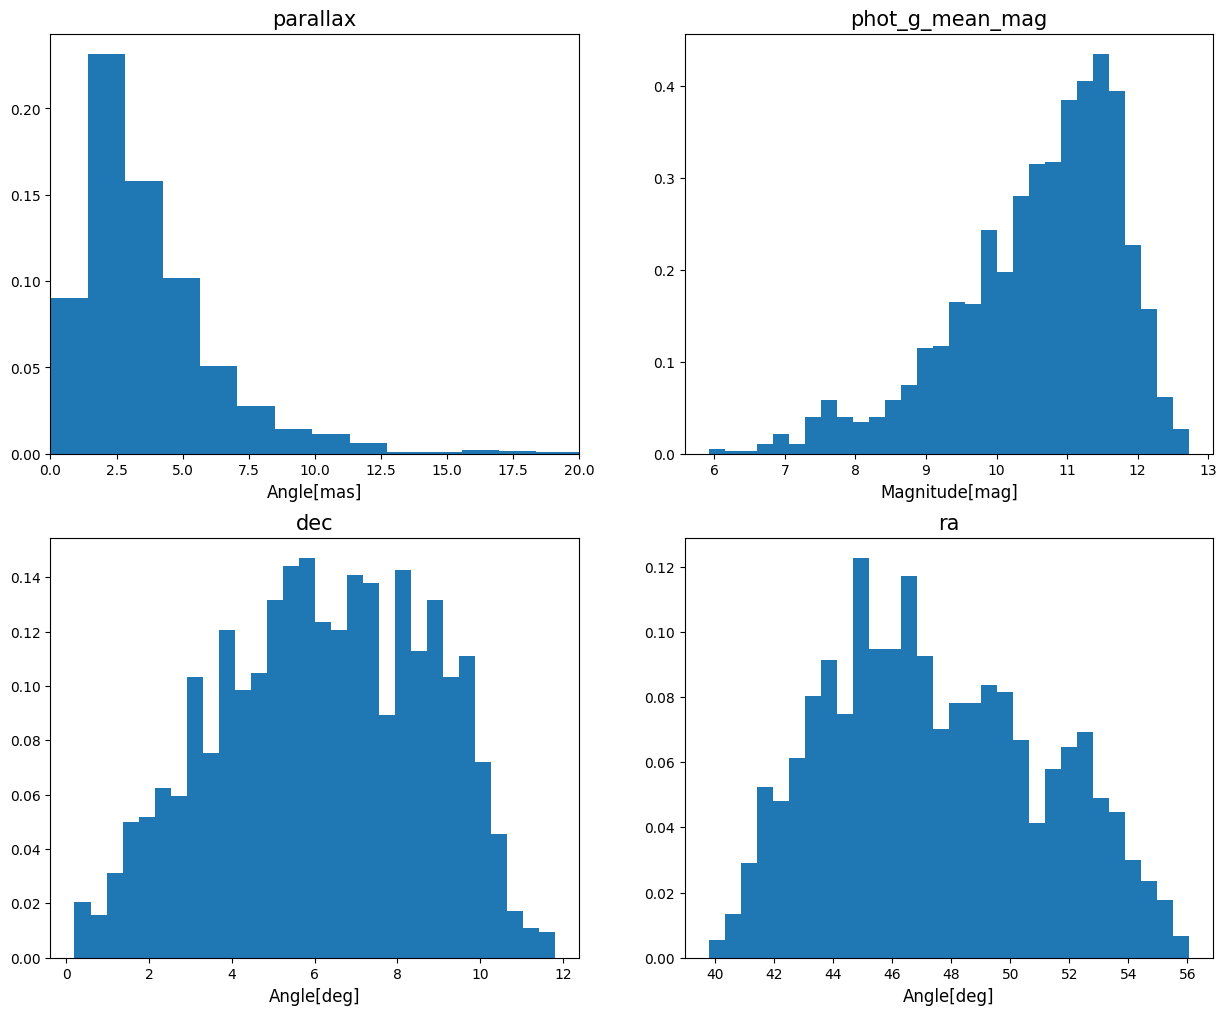

In [15]:
masknans =np.isnan(hdu[1].data['parallax'])
gaia_parallaxes = hdu[1].data['parallax'][~masknans]
min_para= gaia_parallaxes.min() 
max_para= gaia_parallaxes.max() 
pl.figure(figsize=(15,12))
pl.subplot(221)
_=pl.hist(gaia_parallaxes, bins= np.linspace((min_para), (max_para), 50 ), density=True) 

pl.xlim(0,20)
pl.title( hdu[1].columns['parallax'].name ,  fontsize=15)
pl.xlabel(f"{hdu[1].columns['parallax'].unit}", fontsize=12)
pl.subplot(224)
pl.title( hdu[1].columns['ra'].name ,  fontsize=15)
pl.xlabel(f"{hdu[1].columns['ra'].unit}", fontsize=12)
_=pl.hist(hdu[1].data['ra'][~masknans], bins=  30, density=True ) 
pl.subplot(223)
pl.title( hdu[1].columns['dec'].name ,  fontsize=15)
pl.xlabel(f"{hdu[1].columns['dec'].unit}", fontsize=12)
_=pl.hist(hdu[1].data['dec'][~masknans], bins=  30, density=True ) 
pl.subplot(222)
pl.title( hdu[1].columns['phot_g_mean_mag'].name ,  fontsize=15)
pl.xlabel(f"{hdu[1].columns['phot_g_mean_mag'].unit}", fontsize=12)
_=pl.hist(hdu[1].data['phot_g_mean_mag'][~masknans], bins=  30, density=True ) 



In [16]:
ra_fits=hdu[1].data['ra'][~masknans].copy()
dec_fits=hdu[1].data['dec'][~masknans].copy()
hdu.close() 

always remember to close the HDU, otherwise the file remains open. 


## reading astropy table  
Another format catalogs can be in is `.csv` or `.dat`, in general txt files. Astropy provides a way to read'em and easily access as they were `.fits`.  This is thanks to the [astropy.ascii.table](https://docs.astropy.org/en/stable/table/index.html#module-astropy.table)  

### Gaia Radial Velocity Spectrometer


We download the spectra obtained for several sources acquired with the RVS. 
https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_spectroscopic_tables/ssec_dm_rvs_mean_spectrum.html


In [17]:
try :
    table = ascii.read('RvsMeanSpectrum_000000-003111.csv.gz' ,format='ecsv' )
except FileNotFoundError:
    file= wget.download("http://cdn.gea.esac.esa.int/Gaia/gdr3/Spectroscopy/rvs_mean_spectrum/RvsMeanSpectrum_000000-003111.csv.gz")
    table = ascii.read(file ,format='ecsv' )


tables are as easy to handle as the fits files, 

In [18]:
table.colnames, table.columns 

(['source_id',
  'solution_id',
  'ra',
  'dec',
  'flux',
  'flux_error',
  'combined_transits',
  'combined_ccds',
  'deblended_ccds'],
 <TableColumns names=('source_id','solution_id','ra','dec','flux','flux_error','combined_transits','combined_ccds','deblended_ccds')>)

the nicest feature is to print a table 

In [19]:
table

source_id,solution_id,ra,dec,flux,flux_error,combined_transits,combined_ccds,deblended_ccds
,,deg,deg,,,,,
int64,int64,float64,float64,object,object,int16,int16,int16
3332894779520,5950420259779346465,45.05816837835962,0.12740200940467927,[0.9375929 0.9499544 1.0407685 ... 0.94423985 0.9259277 0.9295133 ],[0.07267366 0.06122502 0.05534372 ... 0.04215541 0.04328367 0.0698988 ],11,30,9
9281425163264,5950420259779346465,45.16500904505109,0.20005260394026367,[0.93461174 0.9616833 0.98790395 ... nan nan nan],[0.08734671 0.03126682 0.02534436 ... nan nan nan],9,24,3
12545600306304,5950420259779346465,45.234476460376314,0.3181518585465403,[ nan nan nan ... 1.0696322 0.99120414 0.91193354],[ nan nan nan ... 0.05305395 0.05578898 0.05921795],10,27,2
15741055975040,5950420259779346465,45.13603797419482,0.3350430956016859,[0.978832 0.9767597 0.97194254 ... 0.98286766 0.9764804 0.9839837 ],[0.01523782 0.01562311 0.01630374 ... 0.01598013 0.0196628 0.01873638],12,33,13
17149805245440,5950420259779346465,45.172877013315556,0.4036005073884775,[1.038422 0.97644466 0.95715636 ... 0.89894277 0.9251826 nan],[0.04548939 0.04764479 0.05183659 ... 0.04321915 0.21287043 nan],11,31,10
25980257976960,5950420259779346465,44.8509264538176,0.3984924512899388,[1.0374824 1.0263008 1.0013754 ... nan nan nan],[0.02586808 0.02922445 0.02835907 ... nan nan nan],9,27,2
30343944744320,5950420259779346465,45.09499151004629,0.4768361311353548,[0.97070473 0.9902279 0.99202156 ... 1.1212697 1.0728 1.0159827 ],[0.01386411 0.01500134 0.01668716 ... 0.04415455 0.03831493 0.03146831],13,34,13
45664092292480,5950420259779346465,45.53971179961374,0.5346052138649569,[ nan 0.95808685 0.99271923 ... nan nan nan],[ nan 0.07248034 0.03971327 ... nan nan nan],13,34,13


In [20]:
nrows=table.as_array().shape[0] 
print(table['flux'][0].size) 
rvs_bins  = np.linspace(846,870, table['flux'][0].size )

2401


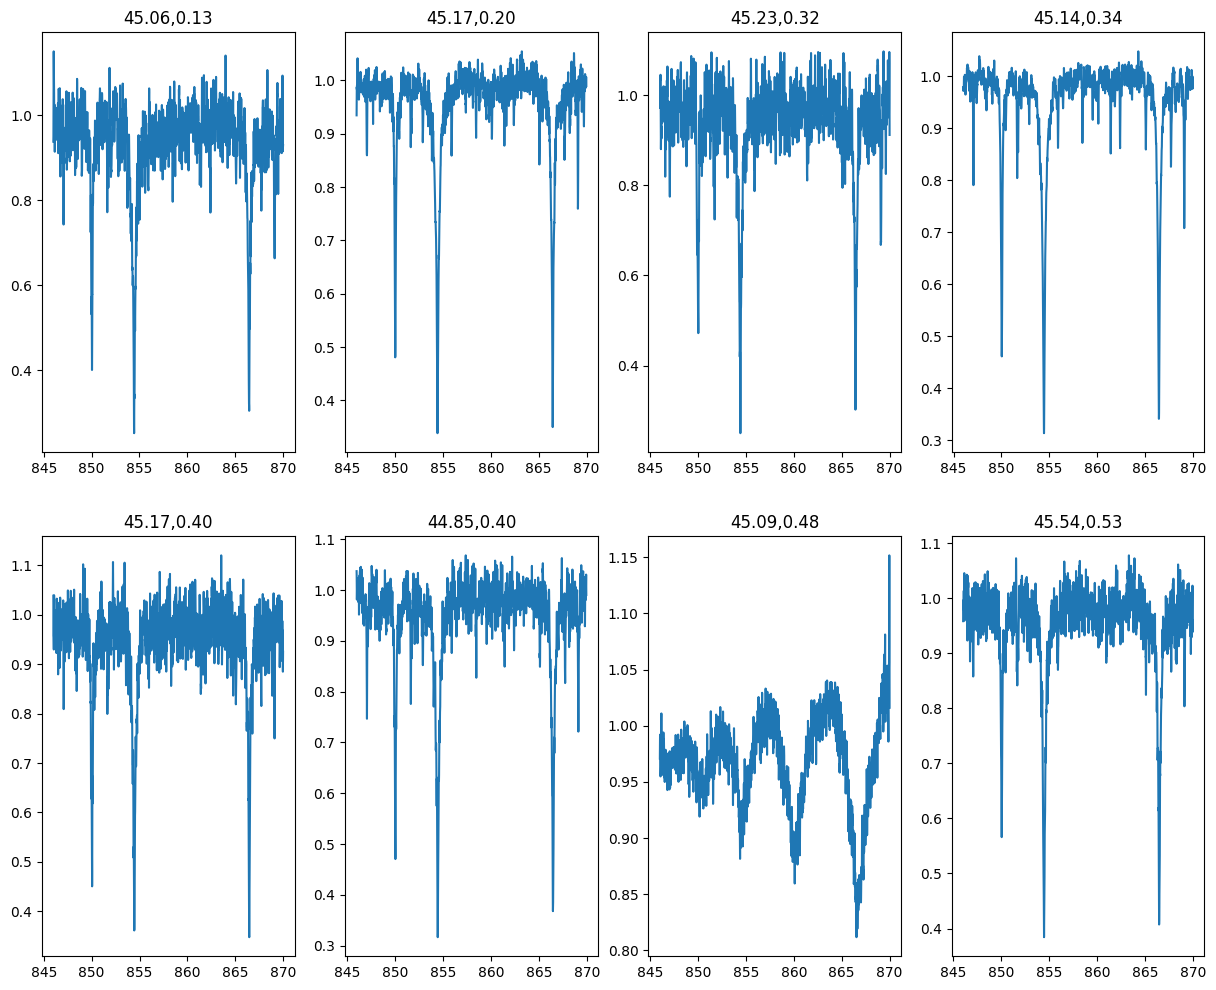

In [21]:
pl.figure(figsize=(15,12))

for i in range(nrows ):  
    pl.subplot(2,4,i+1 )
    #spectrum =   np.float_(table['flux'][i][1:-1].split(',' )  ) 
    spectrum=table['flux'][i]
    pl.title(f"{table['ra'][i]:.2f},{ table['dec'][i]:.2f}")
    pl.plot(rvs_bins,  spectrum ,   )
    if i==7: break 


In [22]:

ra_table= table['ra'] 
dec_table= table['dec'] 

coords_parallax = SkyCoord(ra=ra_fits *u.degree, dec=dec_fits*u.degree)
coords_spectrum  = SkyCoord(ra=ra_table, dec=dec_table)
#

###  matching  two catalogs

we match  sources in both catalogs  at about  the same position, so that the match results into sources whose we know parallax and spectrum. 
astropy has a routine that does this 


In [23]:
from astropy.coordinates import match_coordinates_sky
match_coordinates_sky?

In [24]:
idx, d2d, _ = match_coordinates_sky(coords_parallax , coords_spectrum )

In [25]:
matchmask = d2d< .1*u.arcsec

In [26]:
print(f"we matched {coords_parallax[matchmask].size} stars! ") 

we matched 57 stars! 


In [27]:
table[idx[matchmask]] 

source_id,solution_id,ra,dec,flux,flux_error,combined_transits,combined_ccds,deblended_ccds
,,deg,deg,,,,,
int64,int64,float64,float64,object,object,int16,int16,int16
9281425163264,5950420259779346465,45.16500904505109,0.20005260394026367,[0.93461174 0.9616833 0.98790395 ... nan nan nan],[0.08734671 0.03126682 0.02534436 ... nan nan nan],9,24,3
15741055975040,5950420259779346465,45.13603797419482,0.3350430956016859,[0.978832 0.9767597 0.97194254 ... 0.98286766 0.9764804 0.9839837 ],[0.01523782 0.01562311 0.01630374 ... 0.01598013 0.0196628 0.01873638],12,33,13
86105504493056,5950420259779346465,44.79715156409356,0.630663310646299,[ nan nan 1.0194299 ... nan nan nan],[ nan nan 0.08122481 ... nan nan nan],9,25,7
111600430360448,5950420259779346465,44.918317790277506,0.755078881906543,[1.0029703 0.96418387 0.93304557 ... 0.99087596 0.9777335 0.96377164],[0.02927767 0.03046001 0.02722815 ... 0.0256916 0.03155414 0.03709728],15,38,5
120190364960512,5950420259779346465,45.00799417061545,0.8885621585799379,[0.97617275 0.9893797 1.0023663 ... 1.0084637 1.0055895 1.0034217 ],[0.00909786 0.00839296 0.00881755 ... 0.01108197 0.00870343 0.01034683],11,30,8
139363098967552,5950420259779346465,45.02572536890574,1.1102085951866603,[0.9627694 1.0071824 1.0464016 ... 1.0087472 1.002403 0.99109745],[0.02687249 0.03203715 0.03854219 ... 0.04301753 0.03261046 0.03634724],11,31,4
142730353190144,5950420259779346465,45.66760662681012,0.7120875837207579,[0.98875904 0.994314 0.9956245 ... 0.98402864 0.9723867 0.9673731 ],[0.02897591 0.02669809 0.02276832 ... 0.03318394 0.02614515 0.01881463],15,39,3
148953761446272,5950420259779346465,45.65668551724896,0.8486825939281969,[0.98889947 0.9878907 0.9841254 ... 1.0107963 1.0179378 1.0007058 ],[0.01302619 0.0152682 0.01664482 ... 0.01893557 0.01919248 0.01222586],11,29,12


### write a table and save it 

let's save into disk a new table encoding only the matched sources, we want to include parallax too into this table.


In [28]:
tab_match= table[idx[matchmask]]

tab_match.add_column(gaia_parallaxes[matchmask] , name='parallax') 

ascii.write(table = tab_match ,names= tab_match.colnames,fast_writer=False,  output=  f'matched_gaiadata.dat', overwrite=True )


##  Cosmology

Another useful feature of Astropy is related to [cosmological calculations](https://docs.astropy.org/en/stable/cosmology/index.html).  
The `astropy.cosmology` sub-package contains classes for representing cosmologies and utility functions for calculating commonly used quantities that depend on a cosmological model. This includes distances, ages, and lookback times corresponding to a measured redshift or the transverse separation corresponding to a measured angular separation.

astropy.cosmology.units extends the astropy.units sub-package, adding and collecting cosmological units and equivalencies, like  for keeping track of (dimensionless) factors of the Hubble constant.

In [29]:
from astropy.cosmology import Planck18 as cosmo,z_at_value
from astropy.cosmology import FlatLambdaCDM  
cosmo2= FlatLambdaCDM(Ob0=0,Om0=1, H0=70)

In [30]:
z= np.logspace(-3, 2, 100)
a=  cosmo.scale_factor(z)

In [31]:
print(cosmo2.age(0),cosmo.age(0))

9.312306873150373 Gyr 13.786885302009708 Gyr


Text(0.5, 0, 'redshift')

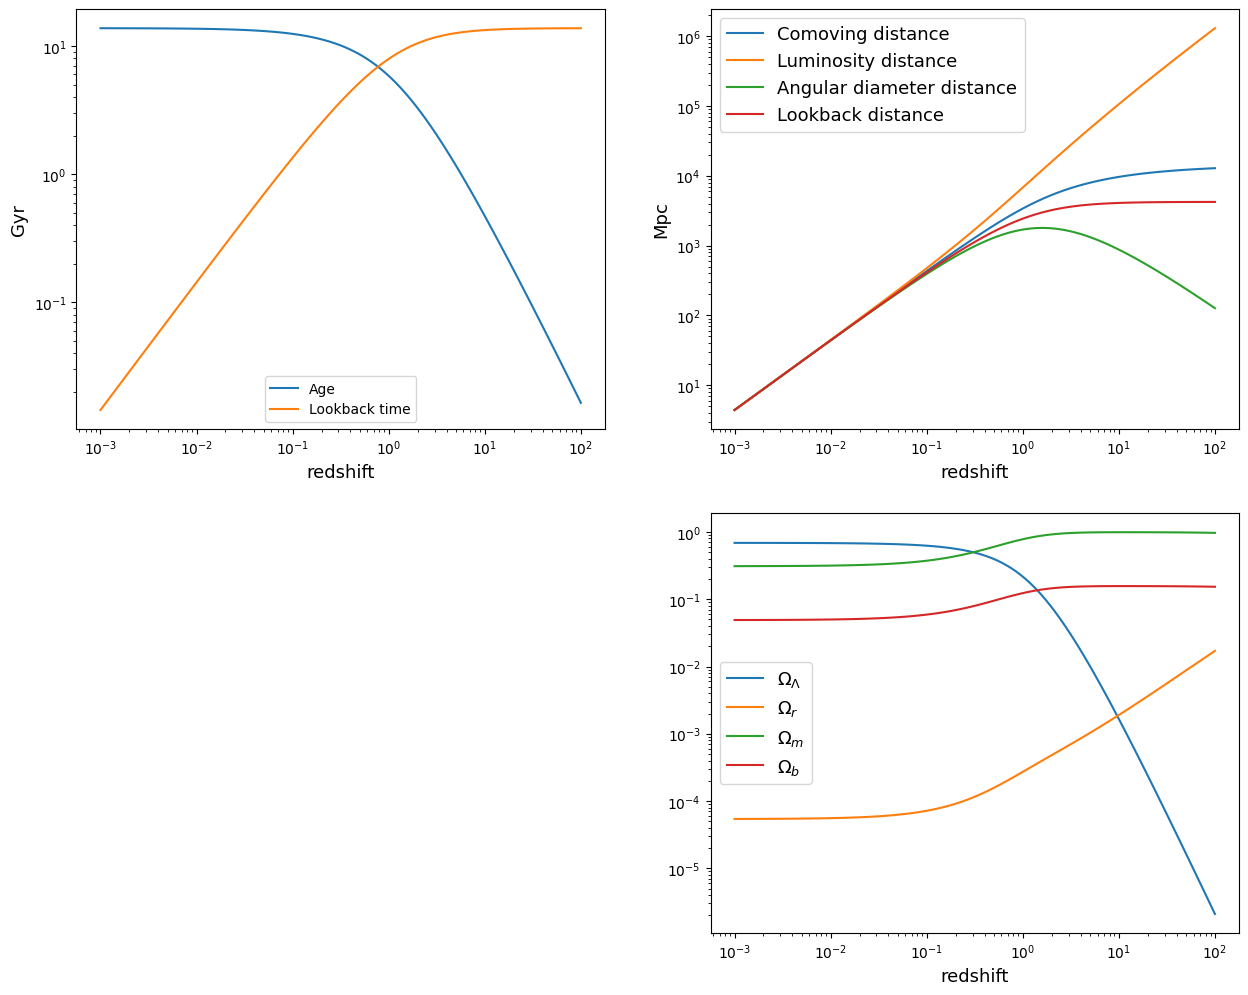

In [32]:
pl.figure(figsize=(15,12))
pl.subplot(221)
pl.loglog(z, cosmo.age(z) , label='Age' ) 
pl.loglog(z, cosmo.lookback_time(z)  , label='Lookback time') 
pl.legend() 
pl.xlabel('redshift',fontsize=13)
pl.ylabel(cosmo.age(z).unit,fontsize=13)

pl.subplot(222)
pl.loglog(z, cosmo.comoving_distance(z) , label='Comoving distance' ) 
pl.loglog(z, cosmo.luminosity_distance(z)  , label='Luminosity distance') 
pl.loglog(z, cosmo.angular_diameter_distance(z)  , label='Angular diameter distance') 
pl.loglog(z, cosmo.lookback_distance(z) , label=r'Lookback distance' ) 
pl.xlabel('redshift',fontsize=13)
pl.ylabel(cosmo.comoving_distance(z).unit,fontsize=13)

pl.legend(fontsize=13) 
pl.subplot(224)
pl.loglog(z, cosmo.Ode(z) , label=r'$\Omega_{\Lambda}$' ) 
pl.loglog(z, cosmo.Ogamma(z) , label=r'$\Omega_{r}$' ) 
pl.loglog(z, cosmo.Om(z)  , label=r'$\Omega_{m}$') 
pl.loglog(z, cosmo.Ob(z)  , label=r'$\Omega_{b}$') 
pl.legend(fontsize=13) 
pl.xlabel('redshift',fontsize=13)


if you know a cosmological quantity and you want to know the redshift which it corresponds to, you can use `z_at_value()`.



In [33]:
print(f"Redshift of M31 :{z_at_value(cosmo.luminosity_distance, 765*u.kpc) }" ) 
print(f"Redshift of an object in the Hubble flow :{z_at_value(cosmo.comoving_distance, cosmo.hubble_distance,) }" ) 

Redshift of M31 :0.0001726295870857113 redshift
Redshift of an object in the Hubble flow :1.4755193476506416 redshift
